Linear Regression

y = w * x + b

where w is the weight and b is the bias.
So we need to find the best w and b that minimize the loss function.

For Loss function we use MSE Loss i.e. Mean squared error loss

mse (L) = 1/n * sum((y-y_pred)**2)

where y_pred = w * x + b

Now we need optimum w and b that minimize the loss function.

For this we use Gradient Descent Algorithm.

Gradient Descent Algorithm:

1. Initialize w and b with random values.
2. Calculate the gradient of the loss function with respect to w and b.
3. Update w and b using the following formula:

w = w + learning_rate * (dL/dw)
b = b + learning_rate * (dL/db)

# Note it's not derivative, rather it's partial derivative.
For ease of readability we write dL/dw as dw and dL/db as db.

i.e. 
w = w + learning_rate * dw
b = b + learning_rate * db

4. Repeat step
5. Stop when the loss function converges to the minimum value.

Now partial derivative of loss function with respect to w and b is:

dw = -2/n * sum(x * (y - y_pred))
db = -2/n * sum(y - y_pred)

where y_pred = w * x + b

Now we can implement the above algorithm in code.


In [5]:
import torch

torch.manual_seed(42)
X = torch.randn(100, 1) * 10
y = 2.5 * X + 5 + torch.randn(100, 1) * 10
X, y

(tensor([[ 1.9269e+01],
         [ 1.4873e+01],
         [ 9.0072e+00],
         [-2.1055e+01],
         [ 6.7842e+00],
         [-1.2345e+01],
         [-4.3067e-01],
         [-1.6047e+01],
         [-7.5214e+00],
         [ 1.6487e+01],
         [-3.9248e+00],
         [-1.4036e+01],
         [-7.2788e+00],
         [-5.5943e+00],
         [-7.6884e+00],
         [ 7.6245e+00],
         [ 1.6423e+01],
         [-1.5960e+00],
         [-4.9740e+00],
         [ 4.3959e+00],
         [-7.5813e+00],
         [ 1.0783e+01],
         [ 8.0080e+00],
         [ 1.6806e+01],
         [ 1.2791e+01],
         [ 1.2964e+01],
         [ 6.1047e+00],
         [ 1.3347e+01],
         [-2.3162e+00],
         [ 4.1759e-01],
         [-2.5158e+00],
         [ 8.5986e+00],
         [-1.3847e+01],
         [-8.7124e+00],
         [-2.2337e+00],
         [ 1.7174e+01],
         [ 3.1888e+00],
         [-4.2452e+00],
         [ 3.0572e+00],
         [-7.7459e+00],
         [-1.5576e+01],
         [ 9.956

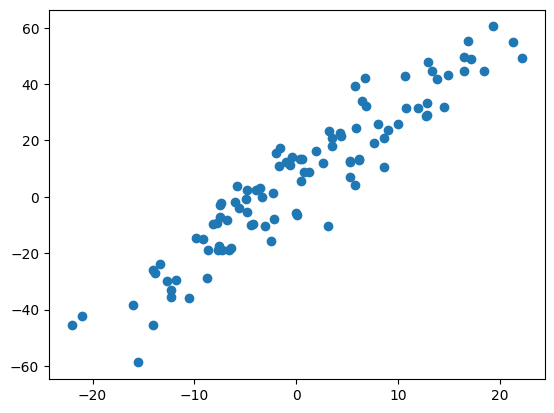

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

## Implementation without PyTorch Autograd

In [15]:
w= torch.randn(1, requires_grad=False)
b= torch.randn(1, requires_grad=False)
w, b

(tensor([-0.4279]), tensor([-0.5007]))

100%|██████████| 100/100 [00:00<00:00, 11898.40it/s]


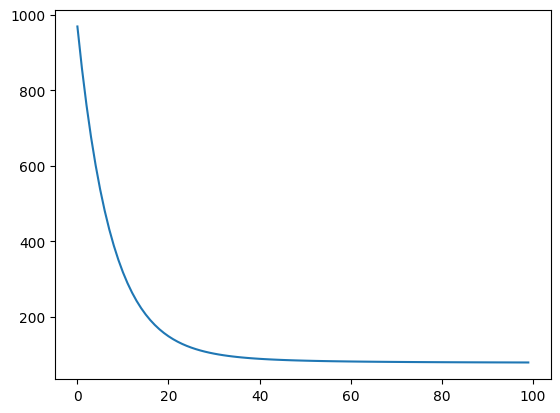

In [16]:
from tqdm import tqdm

learning_rate = 0.01
epochs = 100
losses = []

def forward(X):
    return X * w + b

def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()


for epoch in tqdm(range(epochs)):
    y_pred = forward(X)
    loss = mse(y, y_pred)
    losses.append(loss.item())
    dw = (-2 / X.size(0)) * ((X * (y - y_pred)).sum())
    db = (-2 / X.size(0)) * ((y - y_pred).sum())
    w = w - learning_rate * dw
    b = b - learning_rate * db

plt.plot(losses)

## Implementation with PyTorch Autograd

In [12]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
w, b

(tensor([1.2651], requires_grad=True), tensor([-0.3178], requires_grad=True))

In [13]:
from tqdm import tqdm

learning_rate = 0.01
epochs = 100

loss_list = []

def forward(X):
    return w * X + b

def mse(y_pred, y):
    return ((y_pred - y) ** 2).mean()

for epoch in tqdm(range(epochs)):
    y_pred = forward(X)
    loss = mse(y_pred, y)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_()
        b.grad.zero_()

100%|██████████| 100/100 [00:00<00:00, 4056.35it/s]


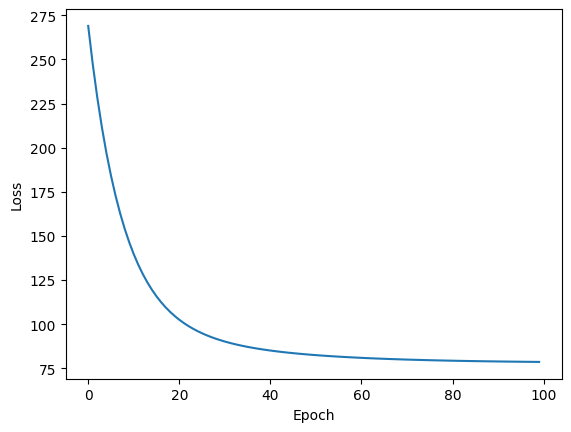

In [14]:
# Plot the loss
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Evaluation